In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [22]:
df_events = pd.read_csv('events.csv')
df_gameinfo = pd.read_csv('ginf.csv')

In [23]:
df_gameinfo.head()

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN


In [24]:
X = ['ht','at']
df_X = df_gameinfo[X]
X_dummies = pd.get_dummies(df_X, X)
X_dummies.head()

,ht_AC Ajaccio,ht_AC Milan,ht_AJ Auxerre,ht_AS Monaco,ht_AS Nancy Lorraine,ht_AS Roma,ht_Alaves,ht_Almeria,ht_Angers,ht_Arsenal,...,at_Valenciennes,at_VfB Stuttgart,at_VfL Wolfsburg,at_Villarreal,at_Watford,at_Werder Bremen,at_West Brom,at_West Ham,at_Wigan,at_Wolves
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


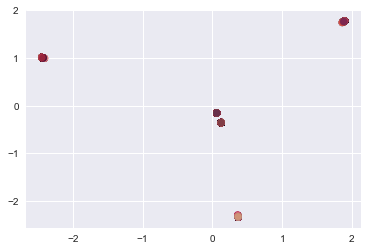

In [35]:
pca = PCA(n_components=2)
pca.fit(X_dummies)
pca.fit_transform(X_dummies)

X = stats.zscore(X_dummies)

U, S, V = np.linalg.svd(X)

PC1 = np.array([row[0] for row in U]) * S[0]
PC2 = np.array([row[1] for row in U]) * S[1]

import seaborn as sns; sns.set()
colors = np.random.rand(len(PC1))
plt.scatter(PC1, PC2, c=colors, alpha=0.5)

In [34]:
len(PC1)

10112